In [1]:
import data_mod as eurostat
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Testing clustering with only frequency 'Every day'
alc_income_freq = eurostat.AlcoholDataset(dataset_name='hlth_ehis_al1i', dataset_group='income', frequences= ['Every day']).get_dataset()
income_data = alc_income_freq[alc_income_freq['TIME_PERIOD'] == 2014].drop(['TIME_PERIOD'], axis=1)
income_data.head()

frequenc,age,geo,sex,quant_inc,Every day
0,75 years or over,Austria,Females,Fifth quintile,14.8
1,75 years or over,Austria,Females,First quintile,5.9
2,75 years or over,Austria,Females,Fourth quintile,7.7
3,75 years or over,Austria,Females,Second quintile,5.1
4,75 years or over,Austria,Females,Third quintile,5.4


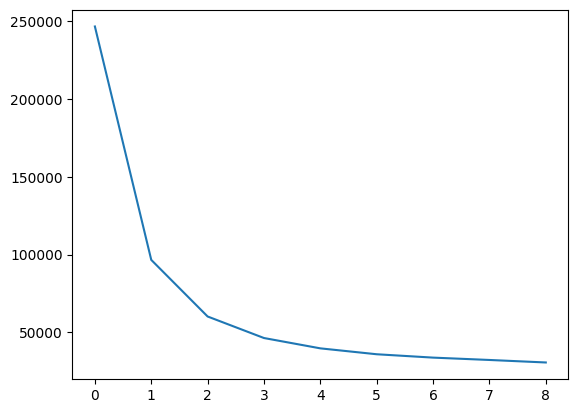

In [2]:
# Test optimal number of cluster with elbow method

cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(income_data, categorical=[0,1,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)

In [3]:
print(cost)
print(income_data.head())

[246560.92247365016, 96555.22743957427, 60172.67721977713, 46335.78861764185, 39696.265922666316, 35905.744946400046, 33745.632224993424, 32233.975007122554, 30621.472057904102]
frequenc               age      geo      sex        quant_inc  Every day
0         75 years or over  Austria  Females   Fifth quintile       14.8
1         75 years or over  Austria  Females   First quintile        5.9
2         75 years or over  Austria  Females  Fourth quintile        7.7
3         75 years or over  Austria  Females  Second quintile        5.1
4         75 years or over  Austria  Females   Third quintile        5.4


In [4]:
# Testing with optimal number of clusters

kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(income_data, categorical=[0,1,2,3])

cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

income_data_with_clusters = income_data.copy()
income_data_with_clusters['clusters'] = cluster_dict

income_data_with_clusters.head()



frequenc,age,geo,sex,quant_inc,Every day,clusters
0,75 years or over,Austria,Females,Fifth quintile,14.8,1
1,75 years or over,Austria,Females,First quintile,5.9,0
2,75 years or over,Austria,Females,Fourth quintile,7.7,0
3,75 years or over,Austria,Females,Second quintile,5.1,0
4,75 years or over,Austria,Females,Third quintile,5.4,0


In [5]:
income_data_clust_0 = income_data_with_clusters[income_data_with_clusters['clusters'] == 0 ]
income_data_clust_1 = income_data_with_clusters[income_data_with_clusters['clusters'] == 1 ]
income_data_clust_2 = income_data_with_clusters[income_data_with_clusters['clusters'] == 2 ]

income_data_clust_0.head()

frequenc,age,geo,sex,quant_inc,Every day,clusters
1,75 years or over,Austria,Females,First quintile,5.9,0
2,75 years or over,Austria,Females,Fourth quintile,7.7,0
3,75 years or over,Austria,Females,Second quintile,5.1,0
4,75 years or over,Austria,Females,Third quintile,5.4,0
40,75 years or over,Bulgaria,Females,Fifth quintile,0.0,0


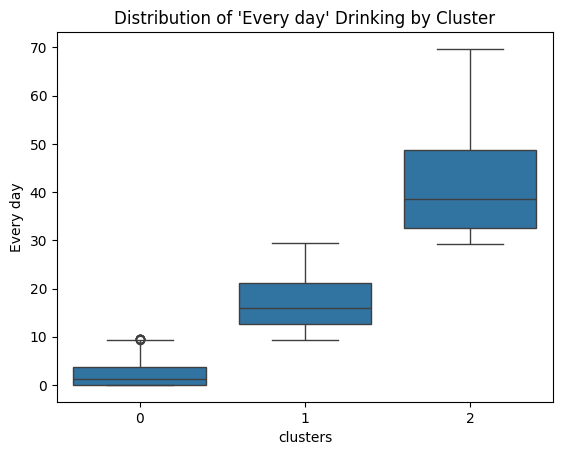

In [6]:
import seaborn as sns

sns.boxplot(x='clusters', y='Every day', data=income_data_with_clusters)
plt.title("Distribution of 'Every day' Drinking by Cluster")
plt.show()

In [7]:
cluster_every_day_means = income_data_with_clusters.groupby('clusters')['Every day'].mean()

print("Every day mean consumption by cluster:\n", cluster_every_day_means)


Every day mean consumption by cluster:
 clusters
0     2.230027
1    17.159840
2    41.744565
Name: Every day, dtype: float64


In [8]:
cluster_income_means = income_data_with_clusters.groupby(['clusters', 'quant_inc'])['Every day'].mean()
print("Average daily consumption by cluster and income quintile:\n", cluster_income_means)


Average daily consumption by cluster and income quintile:
 clusters  quant_inc      
0         Fifth quintile      2.202649
          First quintile      2.166667
          Fourth quintile     2.277632
          Second quintile     2.379139
          Third quintile      2.117586
1         Fifth quintile     17.672308
          First quintile     17.003571
          Fourth quintile    17.443077
          Second quintile    17.486842
          Third quintile     16.422093
2         Fifth quintile     40.376000
          First quintile     40.200000
          Fourth quintile    42.065217
          Second quintile    43.464286
          Third quintile     43.268750
Name: Every day, dtype: float64


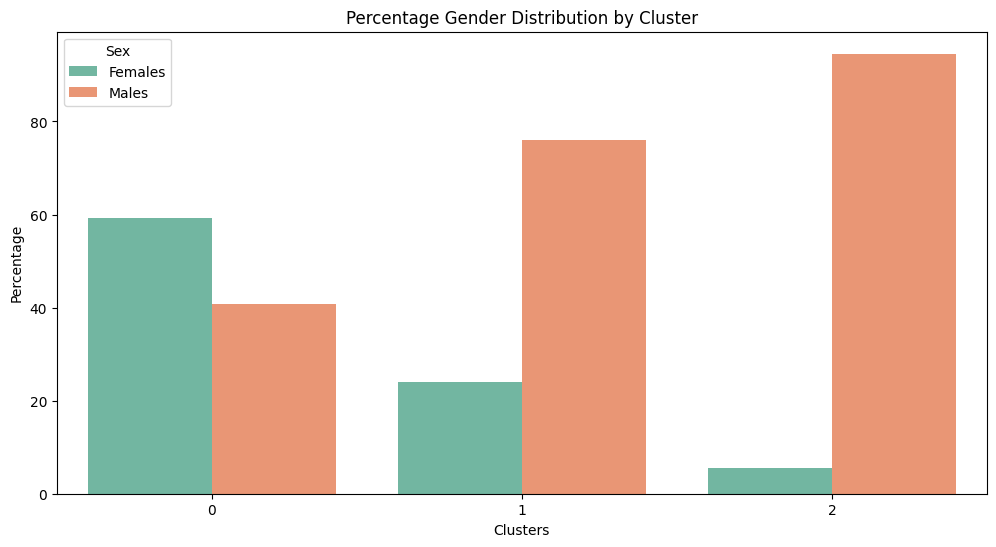

In [9]:
cluster_sex_percentages = income_data_with_clusters.groupby(['clusters', 'sex']).size().reset_index(name='count')
total_counts = cluster_sex_percentages.groupby('clusters')['count'].sum().reset_index(name='total')
cluster_sex_percentages = cluster_sex_percentages.merge(total_counts, on='clusters')
cluster_sex_percentages['percentage'] = cluster_sex_percentages['count'] / cluster_sex_percentages['total'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='clusters', y='percentage', hue='sex', data=cluster_sex_percentages, palette='Set2')
plt.title("Percentage Gender Distribution by Cluster")
plt.xlabel("Clusters")
plt.ylabel("Percentage")
plt.legend(title='Sex')
plt.show()
